In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [2]:
train = pd.read_csv("/content/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test
test= pd.read_csv("/content/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

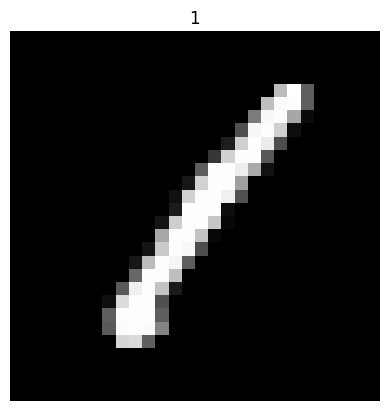

In [5]:
# plot some samples
img = X_train.iloc[0].to_numpy() # Use to_numpy() instead of as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

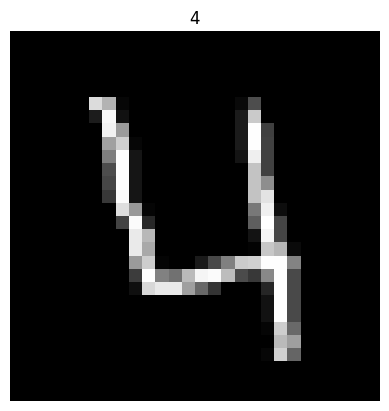

In [6]:
# plot some samples
img = X_train.iloc[3].to_numpy() # Use to_numpy() instead of as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding  # Changed import statement to use tensorflow.keras.utils
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


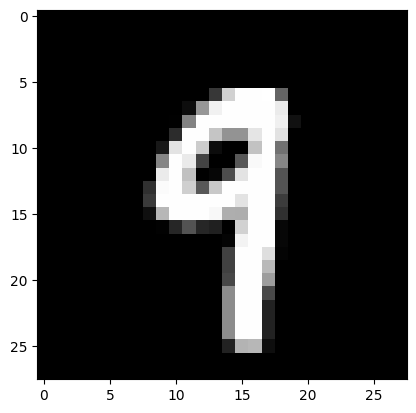

In [11]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [12]:
from keras.utils import image_dataset_from_directory # with this line


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,  # dimension reduction
    rotation_range=5,  # randomly rotate images in the range 5 degrees
    zoom_range=0.1,    # Randomly zoom image 10%
    width_shift_range=0.1,  # randomly shift images horizontally 10%
    height_shift_range=0.1,  # randomly shift images vertically 10%
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False     # randomly flip images
)

datagen.fit(X_train)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

# Set batch size
batch_size = 32 # Added this line to set batch_size

# Set number of epochs
epochs = 10 # Added this line to define epochs

# Fit model
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6892 - loss: 0.9853 - val_accuracy: 0.9338 - val_loss: 0.2445
Epoch 2/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8750 - loss: 0.3171 - val_accuracy: 0.9333 - val_loss: 0.2428
Epoch 3/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9158 - loss: 0.2977 - val_accuracy: 0.9545 - val_loss: 0.1656
Epoch 4/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 1.0000 - loss: 0.1187 - val_accuracy: 0.9543 - val_loss: 0.1661
Epoch 5/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9310 - loss: 0.2276 - val_accuracy: 0.9600 - val_loss: 0.1374
Epoch 6/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 1.0000 - loss: 0.0866 - val_accuracy: 0.9607 - val_loss: 0.1384
Epoch 7/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9434 - loss: 0.1920 - val_accuracy: 0.9650 - val_loss: 0.1168
Epoch 8/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - accuracy: 1.0000 -

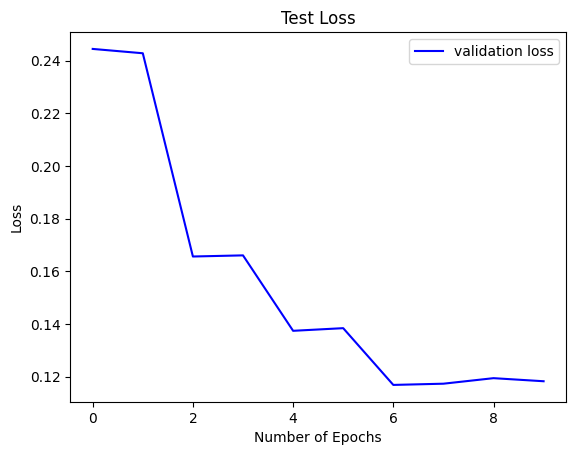

In [17]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


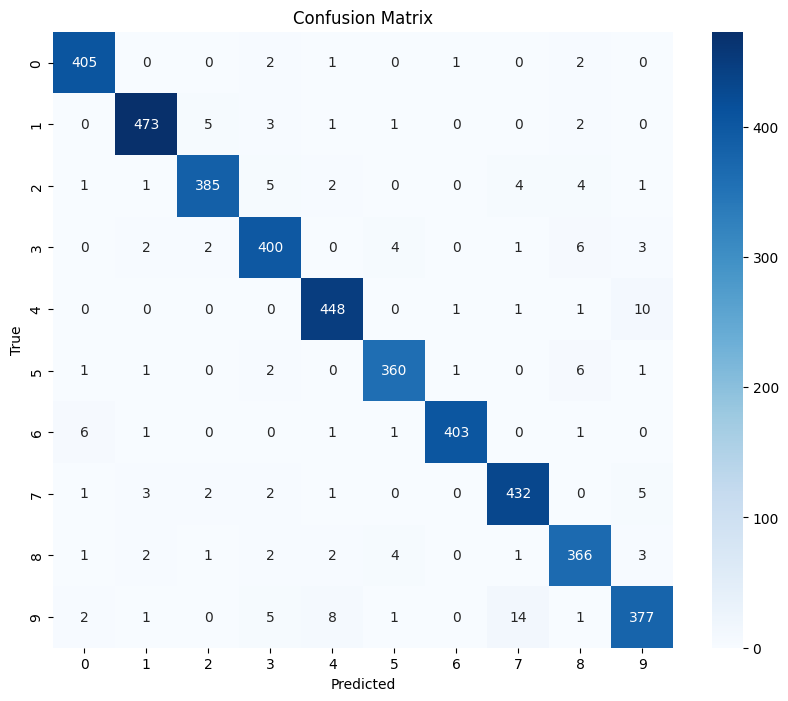

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the validation set
y_pred = model.predict(X_val)

# 2. Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# 3. Convert true labels from one-hot encoding to class labels (if needed)
y_true = np.argmax(Y_val, axis=1)

# 4. Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 5. Define class names (replace with your actual class names)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Example class names for digits 0-9. Replace as needed

# 6. Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 7. Calculate and display evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


# data augmentation

# Instead of using ImageDataGenerator, use image_dataset_from_directory for image preprocessing
# Make sure to specify the directory containing your training images and other parameters like labels, image size, etc.

# Define image height and width
img_height = 128 # Example value, adjust as needed
img_width = 128 # Example value, adjust as needed

train_ds = image_dataset_from_directory(
    'path/to/your/training/images',
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# You can apply data augmentation techniques using the map function on the dataset
def augment_data(image, label):
    # Example: Randomly flip the image horizontally
    image = tf.image.flip_left_right(image)
    return image, label

train_ds = train_ds.map(augment_data)

# ... rest of your code for model training ...